<a href="https://colab.research.google.com/github/Andrei198203/new2_1_final-project/blob/main/new_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
from string import punctuation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
#from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras import models, layers, optimizers, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
# from keras.preprocessing  import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [5]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

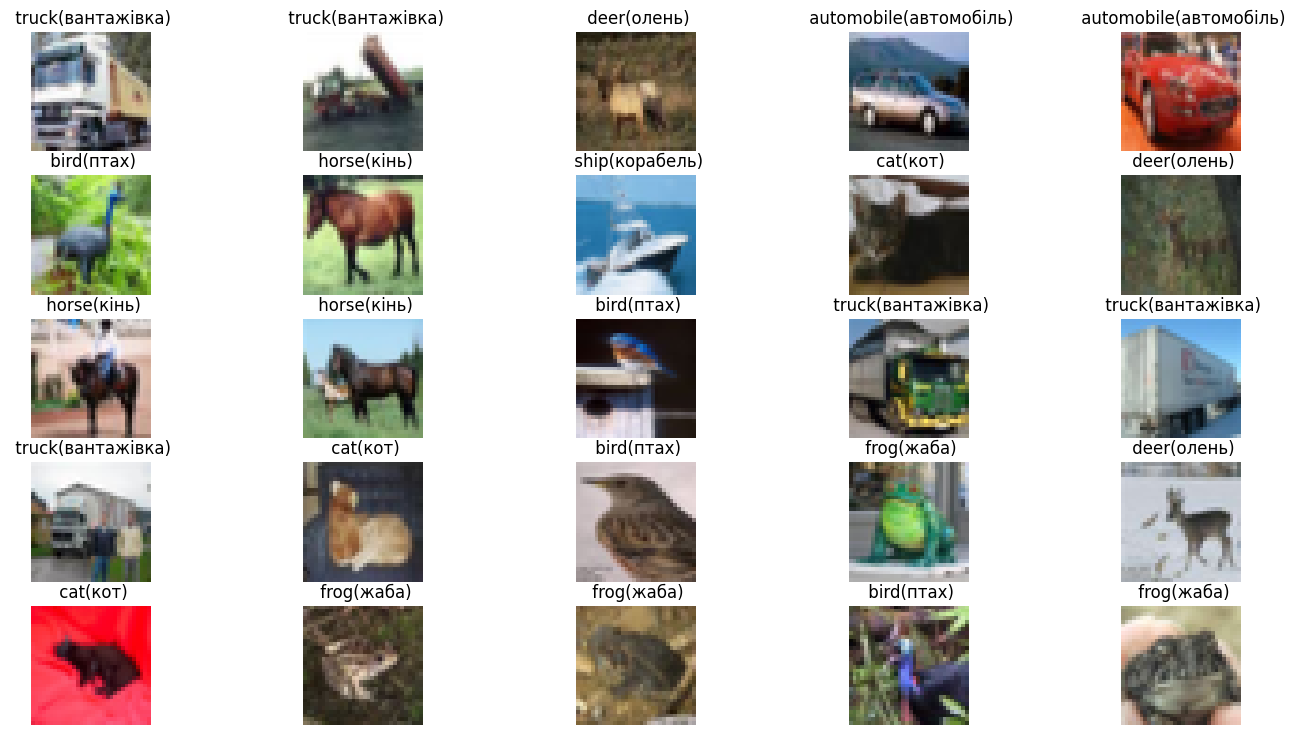

In [6]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [7]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Convert tags to categories


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [9]:
reg=None
reg2=None
num_filters=32
ac='relu'
# adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt=adm
drop_dense=0.5
drop_conv=0
input_shape = (32,32, 3)


model = Sequential(name='cifar10')

# Слой 2D-свертки (например, пространственная свертка изображений)
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg,  input_shape=(32,32, 3), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(1024, activation=ac, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(512, activation=ac, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

E:\Programs\GitHub\ProjectImageClassifier\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,332,138 (43.23 MB)

 Trainable params: 11,319,978 (43.18 MB)

 Non-trainable params: 12,160 (47.50 KB)

In [11]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    metrics=["accuracy"]
)

In [12]:
# model = models.load_model("basesd_model_new.hdf5")

In [13]:
history=model.fit( x_train, y_train,
                  batch_size=256,
                  steps_per_epoch = int(len(x_train) / 256),
                  epochs=20,
                  validation_data=(x_test, y_test) )

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.2219 - loss: 0.6743 - val_accuracy: 0.1002 - val_loss: 0.4331
Epoch 2/20
  1/195 ━━━━━━━━━━━━━━━━━━━━ 2:09 668ms/step - accuracy: 0.4875 - loss: 0.2355

C:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.4875 - loss: 0.2355 - val_accuracy: 0.1007 - val_loss: 0.4352
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.5198 - loss: 0.2291 - val_accuracy: 0.2983 - val_loss: 0.3037
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.6375 - loss: 0.1865 - val_accuracy: 0.2986 - val_loss: 0.3031
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.6440 - loss: 0.1765 - val_accuracy: 0.5721 - val_loss: 0.1971
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.6875 - loss: 0.1552 - val_accuracy: 0.5900 - val_loss: 0.1887
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.7234 - loss: 0.1374 - val_accuracy: 0.7116 - val_loss: 0.1424
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7500 - loss: 0.1074 - val_accuracy: 0.7067 - val_loss: 0.1447
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.7766 - loss: 0.1124 - val_accuracy: 0

In [14]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Percentage of test data accuracy: ", round(result_test[1] * 100, 2))
print("Percentage of training data accuracy: ", round(result_train[1] * 100, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7926 - loss: 0.1134
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9226 - loss: 0.0402
Percentage of test data accuracy:  79.1
Percentage of training data accuracy:  92.33


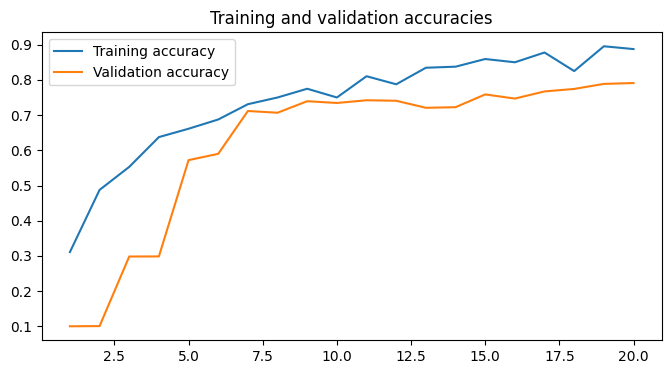

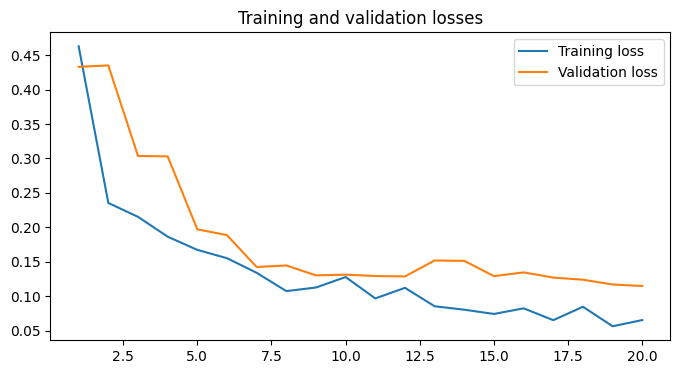

In [15]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [16]:
model.save("basesd_model_new.hdf5")